In [1]:
from sklearn import svm,datasets
from pandas.io.parsers import read_table
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.metrics import roc_curve, auc
import seaborn as sns
from scipy import stats
from nested_dict import nested_dict
from pyfasta import Fasta

In [2]:
def read_icshape_out(out=None, pureID=1):
	out_dict = nested_dict()
	with open(out, 'r') as OUT:
		for line in OUT:
			line = line.strip()
			if not line or line.startswith('#'): continue
			arr = line.split('\t')
			tx_id = arr[0]
			if pureID:
				tx_id = tx_id.split('.')[0]
			length = int(arr[1])
			rpkm = float(arr[2])
			reactivity_ls = arr[3:]
			out_dict[tx_id]['tx_id'] = tx_id
			out_dict[tx_id]['length'] = length
			out_dict[tx_id]['rpkm'] = rpkm
			out_dict[tx_id]['reactivity_ls'] = reactivity_ls
	return out_dict

In [3]:
out_dict_kethoxal_rRNA = read_icshape_out('in_vivo_mRNA_kethoxal.newrRNA.T2t100.out')

kethoxal = out_dict_kethoxal_rRNA['18S']['reactivity_ls']
kethoxal = [np.nan if i == 'NULL' else float(i) for i in kethoxal]
kethoxal_df = pd.DataFrame({'x':kethoxal})

In [45]:
#data import
icshape_125 = pd.read_csv('./ml/icshape.125-r1.18s.list',header=None,names=['x'])
score_125 = pd.read_csv('./ml/score.NAIN3-125-r1.T2t200.18s.list',header=None,names=['x'])
score_125_t500 = pd.read_csv('./ml/score.NAIN3-125-r1.T2t500.18s.list',header=None,names=['x'])
score_125_ext70 = pd.read_csv('./ml/score.NAIN3-125-r1.ex70.T2t200.18s.list',header=None,names=['x'])
score_125_ext150 = pd.read_csv('./ml/score.NAIN3-125-r1.ex150.T2t200.18s.list',header=None,names=['x'])
icshape_paris = pd.read_csv('./ml/invivo.icSHAPE.18s.na.list',header=None,names=['x'])
#score_paris = pd.read_csv('../score.invivo.target.rRNA.t200.18S.na.list',header=None,names=['x'])
# icshape_sl_cy = pd.read_csv('./ml/icSHAPE.1.18s.na.list',header=None,names=['x'])
standard = pd.read_csv('./ml/18S_human.bcolor',header=None,names=['x'])
accessibility = read_table('./ml/18s_o2_sasa.sort.txt',header=None)
#standard = pd.read_csv('../../human_18s_con.ct',header=None,sep='\t')[2]
#flist = ['icshape_25','ml_125','ml_25','ml_125_t500','ml_125_t700','icshape_paris','icshape_sl']
X_test = [icshape_125,score_125,score_125_t500,score_125_ext70,score_125_ext150,icshape_paris, kethoxal_df]
y = standard
accessibility.columns = ['a','b','c']
#accessibility['a']
y.head(), y.shape

(   x
 0  1
 1  1
 2  1
 3  0
 4  0, (1869, 1))

In [5]:
fa_dict = Fasta('./ribosomalRNAindex/human.18s_rRNA.fa', key_fn=lambda key:key.split("\t")[0])
len(fa_dict['18S']), fa_dict['18S'][0:]

(1869,
 u'TACCTGGTTGATCCTGCCAGTAGCATATGCTTGTCTCAAAGATTAAGCCATGCATGTCTGAGTACGCACGGCCGGTACAGTGAAACTGCGAATGGCTCATTAAATCAGTTATGGTTCCTTTGGTCGCTCGCTCCTCTCCTACTTGGATAACTGTGGTAATTCTAGAGCTAATACATGCCGACGGGCGCTGACCCCCTTCGCGGGGGGGATGCGTGCATTTATCAGATCAAAACCAACCCGGTCAGCCCCTCTCCGGCCCCGGCCGGGGGGCGGGCGCCGGCGGCTTTGGTGACTCTAGATAACCTCGGGCCGATCGCACGCCCCCCGTGGCGGCGACGACCCATTCGAACGTCTGCCCTATCAACTTTCGATGGTAGTCGCCGTGCCTACCATGGTGACCACGGGTGACGGGGAATCAGGGTTCGATTCCGGAGAGGGAGCCTGAGAAACGGCTACCACATCCAAGGAAGGCAGCAGGCGCGCAAATTACCCACTCCCGACCCGGGGAGGTAGTGACGAAAAATAACAATACAGGACTCTTTCGAGGCCCTGTAATTGGAATGAGTCCACTTTAAATCCTTTAACGAGGATCCATTGGAGGGCAAGTCTGGTGCCAGCAGCCGCGGTAATTCCAGCTCCAATAGCGTATATTAAAGTTGCTGCAGTTAAAAAGCTCGTAGTTGGATCTTGGGAGCGGGCGGGCGGTCCGCCGCGAGGCGAGCCACCGCCCGTCCCCGCCCCTTGCCTCTCGGCGCCCCCTCGATGCTCTTAGCTGAGTGTCCCGCGGGGCCCGAAGCGTTTACTTTGAAAAAATTAGAGTGTTCAAAGCAGGCCCGAGCCGCCTGGATACCGCAGCTAGGAATAATGGAATAGGACCGCGGTTCTATTTTGTTGGTTTTCGGAACTGAGGCCATGATTAAGAGGGACGGCCGGGGGCATTCGTATTGCGCCGCTAGAGGTGAAATTCTTGGACCGGCGCAAGACGGACCA

               x   y          a
count  62.000000  62  62.000000
mean    0.309855   1  56.013081
std     0.375804   0  16.552574
min     0.000000   1  30.799000
25%     0.036750   1  41.256750
50%     0.110000   1  54.888000
75%     0.480750   1  67.746750
max     1.000000   1  99.858000
                x    y           a
count  108.000000  108  108.000000
mean     0.059648    0   49.383759
std      0.123729    0   13.763408
min      0.000000    0   30.119000
25%      0.006750    0   38.935250
50%      0.021500    0   47.595000
75%      0.061750    0   57.051750
max      1.000000    0   87.974000


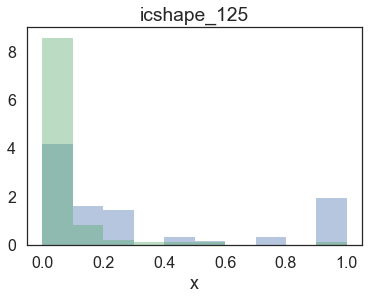

               x   y          a
count  62.000000  62  62.000000
mean    0.350272   1  56.013081
std     0.378752   0  16.552574
min     0.009865   1  30.799000
25%     0.060395   1  41.256750
50%     0.151244   1  54.888000
75%     0.574079   1  67.746750
max     1.000000   1  99.858000
                x    y           a
count  108.000000  108  108.000000
mean     0.107028    0   49.383759
std      0.162303    0   13.763408
min      0.009865    0   30.119000
25%      0.021572    0   38.935250
50%      0.056150    0   47.595000
75%      0.139474    0   57.051750
max      1.000000    0   87.974000


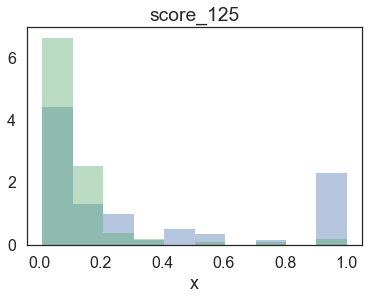

               x   y          a
count  62.000000  62  62.000000
mean    0.350279   1  56.013081
std     0.378746   0  16.552574
min     0.010317   1  30.799000
25%     0.060395   1  41.256750
50%     0.151244   1  54.888000
75%     0.574079   1  67.746750
max     1.000000   1  99.858000
                x    y           a
count  108.000000  108  108.000000
mean     0.107066    0   49.383759
std      0.162280    0   13.763408
min      0.010317    0   30.119000
25%      0.021572    0   38.935250
50%      0.056150    0   47.595000
75%      0.139474    0   57.051750
max      1.000000    0   87.974000


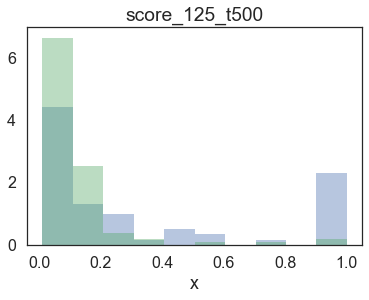

               x   y          a
count  62.000000  62  62.000000
mean    0.360666   1  56.013081
std     0.379481   0  16.552574
min     0.012305   1  30.799000
25%     0.074673   1  41.256750
50%     0.173233   1  54.888000
75%     0.683631   1  67.746750
max     1.000000   1  99.858000
                x    y           a
count  108.000000  108  108.000000
mean     0.109395    0   49.383759
std      0.162809    0   13.763408
min      0.012305    0   30.119000
25%      0.021844    0   38.935250
50%      0.058225    0   47.595000
75%      0.136421    0   57.051750
max      1.000000    0   87.974000


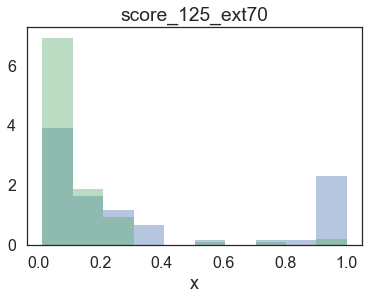

               x   y          a
count  62.000000  62  62.000000
mean    0.373594   1  56.013081
std     0.367819   0  16.552574
min     0.013805   1  30.799000
25%     0.098201   1  41.256750
50%     0.199699   1  54.888000
75%     0.507797   1  67.746750
max     1.000000   1  99.858000
                x    y           a
count  108.000000  108  108.000000
mean     0.102652    0   49.383759
std      0.150402    0   13.763408
min      0.013805    0   30.119000
25%      0.024602    0   38.935250
50%      0.052574    0   47.595000
75%      0.124058    0   57.051750
max      1.000000    0   87.974000


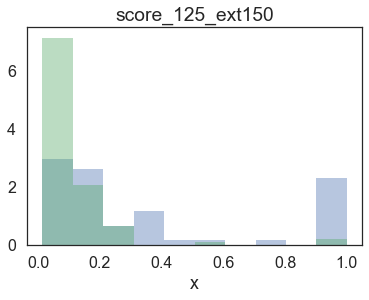

               x   y          a
count  62.000000  62  62.000000
mean    0.273516   1  56.013081
std     0.385844   0  16.552574
min     0.000000   1  30.799000
25%     0.000000   1  41.256750
50%     0.033000   1  54.888000
75%     0.510750   1  67.746750
max     1.000000   1  99.858000
                x    y           a
count  108.000000  108  108.000000
mean     0.015556    0   49.383759
std      0.099013    0   13.763408
min      0.000000    0   30.119000
25%      0.000000    0   38.935250
50%      0.000000    0   47.595000
75%      0.000000    0   57.051750
max      1.000000    0   87.974000


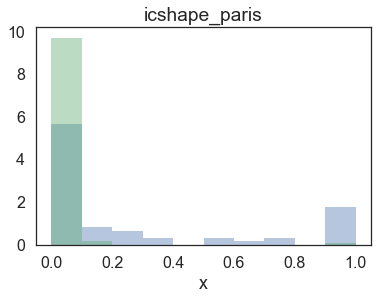

1869 1869
               x   y          a
count  62.000000  62  62.000000
mean    0.406613   1  56.013081
std     0.348183   0  16.552574
min     0.000000   1  30.799000
25%     0.123250   1  41.256750
50%     0.257000   1  54.888000
75%     0.725000   1  67.746750
max     1.000000   1  99.858000
                x    y           a
count  108.000000  108  108.000000
mean     0.194019    0   49.383759
std      0.249124    0   13.763408
min      0.000000    0   30.119000
25%      0.037500    0   38.935250
50%      0.124500    0   47.595000
75%      0.215500    0   57.051750
max      1.000000    0   87.974000


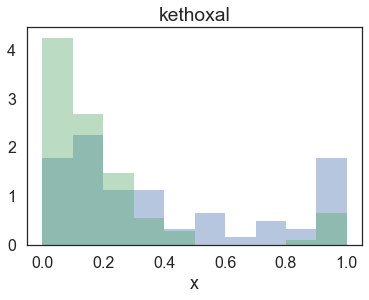

In [96]:
#fpr1,tpr1,_ = roc_curve(y, X1)
#roc_auc1 = auc(fpr1, tpr1)
filelist =['icshape_125','score_125','score_125_t500','score_125_ext70','score_125_ext150','icshape_paris', 'kethoxal']

fpr_list = []
tpr_list = []
roc_auc_list = []
#x_dic = {}
for i in range(len(X_test)):
    #print(i,X_test[i])
    #X_test[i]['y'] = pd.Series(y)
    X_test[i]['y'] = y
    X_test[i]['a'] = pd.Series(accessibility['c'])
    if filelist[i] == 'kethoxal':
        print len(X_test[i]['a']), len(list(fa_dict['18S'][0:]))
        X_test[i]['base'] = list(fa_dict['18S'][0:])
    X_clean = X_test[i].dropna()
    X_select = X_clean[X_clean.a>=30]
    #X_select = X_select[X_select['y']!=0.5]
    X_select = X_select[X_select['x']>=0 ]
    if filelist[i] == 'kethoxal00':
        X_select = X_select[X_select['base'] == 'G' ]
    #print(X_select['y'])
    #fpr,tpr,_ = roc_curve(X_clean['y'],X_clean['x'])
    fpr,tpr,_ = roc_curve(X_select['y'],X_select['x'])
    ml_125_ss = X_select[X_select.y==1]
    ml_125_ds = X_select[X_select.y==0]
    print(ml_125_ss.describe())
    print(ml_125_ds.describe())
    sns.distplot(ml_125_ss.dropna()['x'],norm_hist=True,kde=False, bins=10)
    sns.distplot(ml_125_ds.dropna()['x'],norm_hist=True,kde=False, bins=10)
    plt.title(filelist[i])
    plt.show()
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    roc_auc_list.append(auc(fpr_list[i],tpr_list[i]))


0
1
2
3
4
5
6


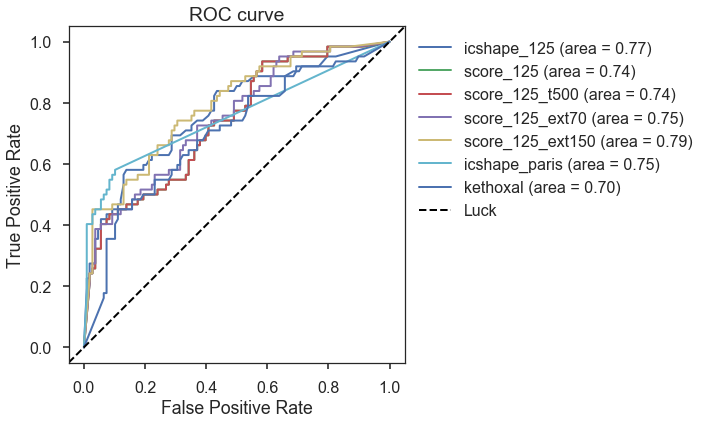

In [97]:
plt.figure()
lw = 2
#plt.plot(fpr1, tpr1, color='darkorange',
#         lw=lw, label='icshape_reactivity (area = %0.2f)' % roc_auc1)
#color = ['red','orange','green','purple','blue','black','yellow']
# filelist =['icshape_125','score_125','score_125_t500','score_125_ext70','score_125_ext150','icshape_paris','icshape_sl_cy']
with sns.axes_style("ticks"):
    fig,ax=plt.subplots(figsize=(6,6))
for i in range(len(X_test)):
    print (i)
    plt.plot(fpr_list[i],tpr_list[i],lw = lw,label = '%s (area = %0.2f)' %(filelist[i],roc_auc_list[i]))
plt.plot([-0.05, 1.05], [-0.05, 1.05], color='black', lw=lw, linestyle='--',label='Luck')
ax.axis('square')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(bbox_to_anchor=(1, 1), loc=2)
# plt.show()
plt.tight_layout()
plt.savefig('human_18S.png')

In [ ]:
ml_125_ss = ml_125[ml_125.y==1]
ml_125_ds = ml_125[ml_125.y==0]
sns.distplot(ml_125_ss.dropna()['x'],norm_hist=True,kde=False, bins=20,fit=stats.beta)
sns.distplot(ml_125_ds.dropna()['x'],norm_hist=True,kde=False, bins=20,fit=stats.beta)
plt.show()